In [1]:
# Data Analysis.

from utils.seqlab import Label_Begin, Label_End, Label_Pad, Label_Dictionary

print(Label_Begin)
print(Label_End)
print(Label_Pad)
Label_Dictionary

[CLS]
[SEP]
III


{'[CLS]': -100,
 '[SEP]': -100,
 'III': -100,
 'iii': 0,
 'iiE': 1,
 'iEi': 2,
 'Eii': 3,
 'iEE': 4,
 'EEi': 5,
 'EiE': 6,
 'EEE': 7}

In [1]:
# Count how many occurences each token has.
import os
import pandas as pd

# seqlab_data_dir = os.path.join("workspace", "seqlab", "seqlab.strand-positive.kmer.stride-510.from-index")
seqlab_data_dir = os.path.join("workspace", "seqlab", "seqlab-3")
seqlab_train_10 = os.path.join(seqlab_data_dir, "gene_train_bundle.10.csv")
seqlab_train_25 = os.path.join(seqlab_data_dir, "gene_train_bundle.25.csv")
seqlab_train = os.path.join(seqlab_data_dir, "gene_train_bundle.csv")

def count_token_freq(csv):
    count_dict = {
        '[CLS]': 0,
        '[SEP]': 0,
        'III': 0,
        'iii': 0,
        'iiE': 0,
        'iEi': 0,
        'Eii': 0,
        'iEE': 0,
        'EEi': 0,
        'EiE': 0,
        'EEE': 0
    }
    df = pd.read_csv(csv)
    for i, r in df.iterrows():
        sequence = r["label"]
        sequence = sequence.split(" ") # Split sequence into array of tokens.
        for token in sequence:
            count_dict[token] += 1
    return count_dict

In [2]:
count_dicts = []
for p in [seqlab_train_10, seqlab_train_25, seqlab_train]:
    count_dicts.append(
        count_token_freq(p)
    )

In [3]:
print(count_dicts)

[{'[CLS]': 0, '[SEP]': 0, 'III': 0, 'iii': 65938492, 'iiE': 10498, 'iEi': 0, 'Eii': 10606, 'iEE': 10502, 'EEi': 10619, 'EiE': 6, 'EEE': 5175186}, {'[CLS]': 0, '[SEP]': 0, 'III': 0, 'iii': 164856315, 'iiE': 26327, 'iEi': 0, 'Eii': 26492, 'iEE': 26347, 'EEi': 26506, 'EiE': 7, 'EEE': 12889534}, {'[CLS]': 0, '[SEP]': 0, 'III': 0, 'iii': 659603390, 'iiE': 104949, 'iEi': 0, 'Eii': 104953, 'iEE': 104963, 'EEi': 104974, 'EiE': 13, 'EEE': 51433298}]


In [4]:
filtered_count_dicts_10 = count_dicts[0]
filtered_count_dicts_25 = count_dicts[1]
filtered_count_dicts = count_dicts[2]
token_labels = [
    'iii',
    'iiE',
    'iEi',
    'Eii',
    'iEE',
    'EEi',
    'EiE',
    'EEE'
]

filtered_count_dicts

{'[CLS]': 0,
 '[SEP]': 0,
 'III': 0,
 'iii': 659603390,
 'iiE': 104949,
 'iEi': 0,
 'Eii': 104953,
 'iEE': 104963,
 'EEi': 104974,
 'EiE': 13,
 'EEE': 51433298}

In [5]:
count_dicts_with_dummy = []
for i in range(len(count_dicts)):
    count_dicts_with_dummy.append(count_dicts[i])

weights = []
for c in count_dicts_with_dummy:
    values = [c[k] for k in c.keys()]
    max_value = max(values)
    min_value = min([
        c['iiE'],
        c['Eii'],
        c['iEE'],
        c['EEi']
    ])
    w = {}
    for k in c.keys():
        if c[k] < min_value:
            w[k] = min_value / max_value
        else:
            w[k] = min_value / c[k]
    weights.append(w)


In [6]:
weights    

[{'[CLS]': 0.00015920897918017294,
  '[SEP]': 0.00015920897918017294,
  'III': 0.00015920897918017294,
  'iii': 0.00015920897918017294,
  'iiE': 1.0,
  'iEi': 0.00015920897918017294,
  'Eii': 0.9898170846690553,
  'iEE': 0.9996191201675871,
  'EEi': 0.9886053300687447,
  'EiE': 0.00015920897918017294,
  'EEE': 0.0020285261244716614},
 {'[CLS]': 0.00015969664249743785,
  '[SEP]': 0.00015969664249743785,
  'III': 0.00015969664249743785,
  'iii': 0.00015969664249743785,
  'iiE': 1.0,
  'iEi': 0.00015969664249743785,
  'Eii': 0.9937717046655594,
  'iEE': 0.9992409002922534,
  'EEi': 0.9932468120425564,
  'EiE': 0.00015969664249743785,
  'EEE': 0.002042509837826565},
 {'[CLS]': 0.00015910924896853548,
  '[SEP]': 0.00015910924896853548,
  'III': 0.00015910924896853548,
  'iii': 0.00015910924896853548,
  'iiE': 1.0,
  'iEi': 0.00015910924896853548,
  'Eii': 0.9999618877021142,
  'iEE': 0.9998666196659776,
  'EEi': 0.9997618457903862,
  'EiE': 0.00015910924896853548,
  'EEE': 0.002040487467865

In [7]:
labels =  ['iii', 'iiE', 'iEi', 'Eii', 'iEE', 'EEi', 'EiE', 'EEE']
seqlab_10_loss_weight = [weights[0][l] for l in labels]
seqlab_25_loss_weight = [weights[1][l] for l in labels]
seqlab_loss_weight = [weights[2][l] for l in labels]

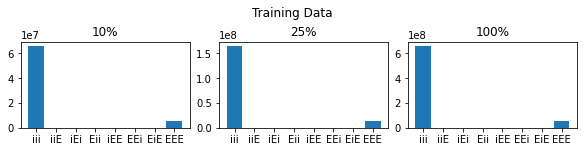

In [20]:
import matplotlib.pyplot as plt
labels = count_dicts[0].keys()
labels = [a for a in labels]

titles = ["tiny, small, complete"]
figs, axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(8, 2))
figs.suptitle("Training Data")
keys = [a for a in count_dicts[0].keys() if a != '[CLS]' and a != '[SEP]' and a != 'III']
axes[0].bar(keys, [count_dicts[0][a] for a in keys], label="10%")
axes[0].set_title("10%")
axes[1].bar(keys, [count_dicts[1][a] for a in keys], label="25%")
axes[1].set_title("25%")
axes[2].bar(keys, [count_dicts[2][a] for a in keys], label="100%")
axes[2].set_title("100%")

plt.show()

In [16]:
count_dicts[0].keys()
keys = [a for a in count_dicts[0].keys() if a != '[CLS]' and a != '[SEP]']
[count_dicts[0][a] for a in keys]


[0, 65938492, 10498, 0, 10606, 10502, 10619, 6, 5175186]

0 8191


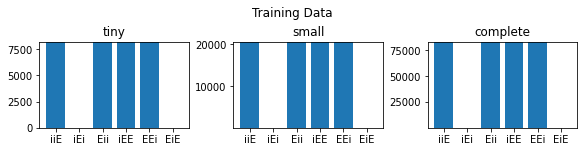

In [19]:
titles = ["tiny, small, complete"]
figs, axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(8, 2))
figs.suptitle("Training Data")
keys = [a for a in count_dicts[0].keys()]
keys = keys[1:-1]
# keys = ["iiE", "Eii", "iEE", "EEi"]
count_dicts_zero = [count_dicts[0][a] for a in keys]
min_zero = min(count_dicts_zero)
# min_zero += 100 # Give minimum a little break.
max_zero = max(count_dicts_zero)
print(min_zero, max_zero)
axes[0].set(ylim=[min_zero, max_zero + 10])
axes[0].bar(keys, [count_dicts[0][a] for a in keys], label="tiny")
axes[0].set_title("tiny")

count_dicts_one = [count_dicts[1][a] for a in keys]
min_one = min(count_dicts_one)
min_one += 100
axes[1].set(ylim=[min_one, max(count_dicts_one)])
axes[1].bar(keys, [count_dicts[1][a] for a in keys], label="small")
axes[1].set_title("small")

count_dicts_two = [count_dicts[2][a] for a in keys]
min_two = min(count_dicts_two)
min_two += 100
axes[2].set(ylim=[min_two, max(count_dicts_two)])
axes[2].bar(keys, [count_dicts[2][a] for a in keys], label="complete")
axes[2].set_title("complete")

plt.show()

In [82]:
import os
import matplotlib.pyplot as plt

seqlab_val_dir = os.path.join("workspace", "seqlab", "seqlab.strand-positive.kmer.stride-510.from-index")
seqlab_val_10 = os.path.join(seqlab_val_dir, "gene_validation_bundle.10.csv")
seqlab_val_25 = os.path.join(seqlab_val_dir, "gene_validation_bundle.25.csv")
seqlab_val = os.path.join(seqlab_val_dir, "gene_validation_bundle.csv")

val_count_dicts = []
for p in [seqlab_val_10, seqlab_val_25, seqlab_val]:
    val_count_dicts.append(
        count_token_freq(p)
    )

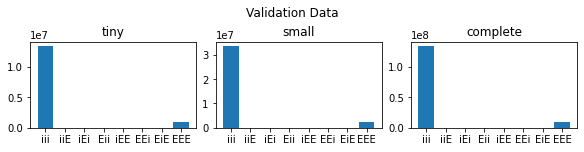

In [95]:

figs, axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(8, 2))
figs.suptitle("Validation Data")
axes[0].bar(labels, [val_count_dicts[0][a] for a in val_count_dicts[0].keys()])
axes[0].set_title("tiny")
axes[1].bar(labels, [val_count_dicts[1][a] for a in val_count_dicts[1].keys()])
axes[1].set_title("small")
axes[2].bar(labels, [val_count_dicts[2][a] for a in val_count_dicts[2].keys()])
axes[2].set_title("complete")

plt.show()



In [20]:
import os

genlab_data_dir = os.path.join("workspace", "genlab", "seqlab.strand-positive.kmer.stride-510")
genlab_train_bundle_10 = os.path.join(genlab_data_dir, "gene_train_index_bundle.10.csv")
genlab_train_bundle_25 = os.path.join(genlab_data_dir, "gene_train_index_bundle.25.csv")
genlab_train_bundle = os.path.join(genlab_data_dir, "gene_train_index_bundle.csv")

genlab_count_dicts = []
for p in [genlab_train_bundle_10, genlab_train_bundle_25, genlab_train_bundle]:
    genlab_count_dicts.append(
        count_token_freq(p)
    )

genlab_count_dicts_with_dummy = []
for i in range(len(count_dicts)):
    genlab_count_dicts_with_dummy.append(genlab_count_dicts[i])

genlab_weights = []
for c in genlab_count_dicts_with_dummy:
    values = [c[k] for k in c.keys()]
    max_value = max(values)
    min_value = min([
        c['iiE'],
        c['Eii'],
        c['iEE'],
        c['EEi']
    ])
    w = {}
    for k in c.keys():
        if c[k] < min_value:
            w[k] = min_value / max_value
        else:
            w[k] = min_value / c[k]
    genlab_weights.append(w)

genlab_labels =  ['iii', 'iiE', 'iEi', 'Eii', 'iEE', 'EEi', 'EiE', 'EEE']
genlab_10_loss_weight = [weights[0][l] for l in genlab_labels]
genlab_25_loss_weight = [weights[1][l] for l in genlab_labels]
genlab_loss_weight = [weights[2][l] for l in genlab_labels]


In [21]:
print(genlab_10_loss_weight, genlab_25_loss_weight, genlab_loss_weight)

[0.0001555761504390511, 0.9998775560181217, 0.0001555761504390511, 0.9969478696129899, 1.0, 0.9971913542557089, 0.0001555761504390511, 0.0019914280314346157] [0.00015717190553216775, 0.9999030960802364, 0.00015717190553216775, 0.9997093445720099, 1.0, 1.0, 0.00015717190553216775, 0.0020191783293449415] [0.0001583913443766686, 1.0, 0.0001583913443766686, 1.0, 0.9999639301688068, 0.9999639301688068, 0.0001583913443766686, 0.0020260445716651057]


In [ ]:
import os
import matplotlib.pyplot as plt

seqlab_val_dir = os.path.join("workspace", "seqlab", "seqlab.strand-positive.kmer.stride-510.from-index")
seqlab_val_10 = os.path.join(seqlab_val_dir, "gene_validation_bundle.10.csv")
seqlab_val_25 = os.path.join(seqlab_val_dir, "gene_validation_bundle.25.csv")
seqlab_val = os.path.join(seqlab_val_dir, "gene_validation_bundle.csv")

val_count_dicts = []
for p in [seqlab_val_10, seqlab_val_25, seqlab_val]:
    val_count_dicts.append(
        count_token_freq(p)
    )

figs, axes = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(8, 2))
figs.suptitle("Validation Data")
axes[0].bar(labels, [val_count_dicts[0][a] for a in val_count_dicts[0].keys()])
axes[0].set_title("tiny")
axes[1].bar(labels, [val_count_dicts[1][a] for a in val_count_dicts[1].keys()])
axes[1].set_title("small")
axes[2].bar(labels, [val_count_dicts[2][a] for a in val_count_dicts[2].keys()])
axes[2].set_title("complete")

plt.show()

In [4]:
import os
import pandas as pd

sso_dir_path = os.path.join("workspace", "seqlab", "seqlab-3", "ss-allpos-01")
sso_files = os.listdir(sso_dir_path)
sso_files = [os.path.join(sso_dir_path, s) for s in sso_files]
sso_files

df = pd.DataFrame()
for s in sso_files:
    df = pd.concat((df, pd.read_csv(s)))

df.shape


(95546, 2)

In [6]:
from tqdm import tqdm

token_label_count = {
    'iii': 0,
    'iiE': 0,
    'iEi': 0,
    'Eii': 0,
    'iEE': 0,
    'EEi': 0,
    'EiE': 0,
    'EEE': 0
}
labels = df["label"].values
labels = [a.split(' ') for a in labels]
for a in tqdm(labels, total=len(labels), desc="Counting"):
    for t in a:
        token_label_count[t] += 1

token_label_count

Counting: 100%|██████████| 95546/95546 [00:07<00:00, 12934.67it/s]


{'iii': 34814422,
 'iiE': 77933,
 'iEi': 0,
 'Eii': 74543,
 'iEE': 77932,
 'EEi': 74528,
 'EiE': 0,
 'EEE': 13609102}

In [ ]:
import matplotlib.pyplot as plt

